In [16]:
import pandas
import matplotlib.pyplot as plt

In [23]:
def intify(_l):
    for i in range(len(_l)):
        try:
            _l[i] = int(_l[i])
        except:
            pass
    return _l

In [25]:
colnames = [
    "n_wifi_off",
    "connected_mesh",
    "best_case_connected_mesh",
    "worst_case_connected_mesh",
]
data = pandas.read_csv("Mesh Robustness - No-mesh (5X4X7).csv", names=colnames)

NO_MESH_DATA = {
    "n_wifi_off": intify(data.n_wifi_off.tolist()[1:]),
    "connected_mesh": intify(data.connected_mesh.tolist()[1:]),
    "best_case_connected_mesh": intify(data.best_case_connected_mesh.tolist()[1:]),
    "worst_case_connected_mesh": intify(data.worst_case_connected_mesh.tolist()[1:]),
}

data = pandas.read_csv(
    "Mesh Robustness - With Mesh (5 Hops) (5X4X7).csv", names=colnames
)

WITH_MESH_DATA = {
    "n_wifi_off": intify(data.n_wifi_off.tolist()[1:]),
    "connected_mesh": intify(data.connected_mesh.tolist()[1:]),
    "best_case_connected_mesh": intify(data.best_case_connected_mesh.tolist()[1:]),
    "worst_case_connected_mesh": intify(data.worst_case_connected_mesh.tolist()[1:]),
}

print(NO_MESH_DATA, "\n\n", WITH_MESH_DATA)

{'n_wifi_off': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'connected_mesh': [218, 208, 199, 189, 179, 169, 159, 149, 139, 128, 117, 106, 95, 84, 72, 61, 49, 37, 25, 13, 0], 'best_case_connected_mesh': [218, 212, 206, 200, 194, 185, 176, 166, 156, 145, 134, 123, 112, 101, 90, 77, 63, 49, 33, 17, 0], 'worst_case_connected_mesh': [218, 206, 193, 180, 166, 153, 139, 129, 118, 107, 97, 86, 75, 65, 54, 44, 33, 25, 17, 9, 0]} 

 {'n_wifi_off': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'connected_mesh': [218, 218, 216, 214, 211, 206, 200, 194, 186, 176, 166, 155, 142, 128, 114, 98, 80, 62, 43, 22, 0], 'best_case_connected_mesh': [218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 204, 190, 169, 148, 127, 106, 85, 57, 29, 0], 'worst_case_connected_mesh': [218, 218, 211, 204, 190, 183, 169, 162, 148, 134, 127, 113, 99, 92, 78, 64, 50, 43, 29, 15, 0]}


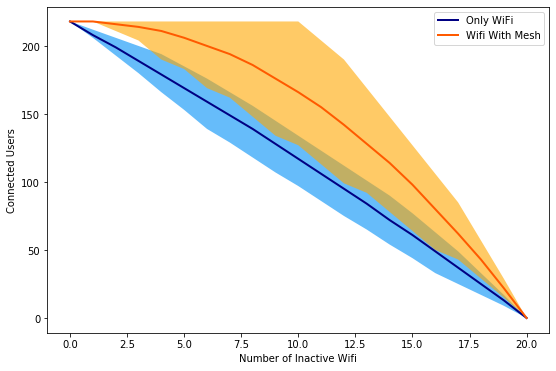

In [80]:
plt.figure(figsize=(9, 6))

x = NO_MESH_DATA["n_wifi_off"]  # or WITH_MESH_DATA['n_wifi_off']

plt.plot(x, NO_MESH_DATA["connected_mesh"], label="Only WiFi", c="#000083", linewidth=2)

plt.plot(
    x,
    WITH_MESH_DATA["connected_mesh"],
    label="Wifi With Mesh",
    c="#ff5a00",
    linewidth=2,
)

plt.fill_between(
    x,
    NO_MESH_DATA["best_case_connected_mesh"],
    NO_MESH_DATA["worst_case_connected_mesh"],
    fc="#0090f8",
    alpha = 0.6
)

plt.fill_between(
    x,
    WITH_MESH_DATA["best_case_connected_mesh"],
    WITH_MESH_DATA["worst_case_connected_mesh"],
    fc="#ffa700",
    alpha = 0.6
)

# plt.plot(
#     x,
#     WITH_MESH_DATA["best_case_connected_mesh"],
#     label="Wifi With Mesh",
#     c="#0090f8",
#     linewidth=0.5,
#     linestyle=':'
# )

# plt.plot(x_vals, round_trip_times, label="Avg. Round Trip Time Values", c="green")
plt.ylabel("Connected Users")
plt.xlabel("Number of Inactive Wifi")
plt.legend()
# # save figure
plt.savefig('./sim.png')
plt.show()